In [1]:
import pandas as pd
from magine.data.experimental_data import ExperimentalData  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = ['arial']

sns.set_theme(
    context ='paper',
    palette="Paired", 
    style='white',
    font='arial',
    # font_scale=1.0
)

In [3]:
exp_data = ExperimentalData('both_proteomics_for_magine.csv.gz')

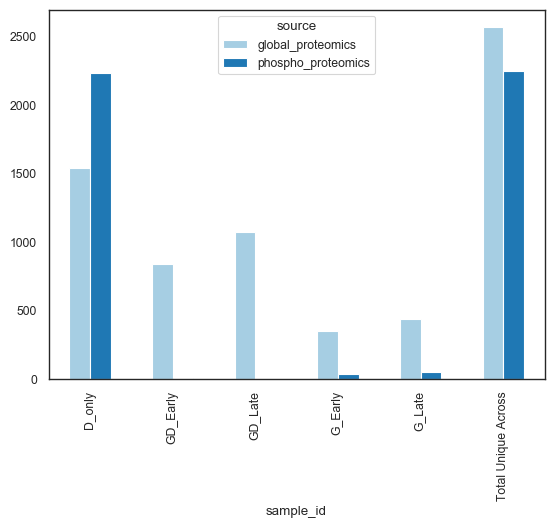

In [4]:
exp_data.create_summary_table(sig=True).T.plot(kind='bar')
plt.savefig('diff_expressed.png', dpi=300, bbox_inches='tight')

In [7]:
def mod_df(df):
    df['stage'] = df.sample_id.str.split('_').str.get(1)
    df['drug'] = df.sample_id.str.split('_').str.get(0)
    df.loc[df.stage=='only', 'stage'] = 'Dec only'
    df.loc[df.drug=='D', 'drug'] = '0D'
    df.loc[df.drug=='GD', 'drug'] = '1GD'
    df.loc[df.drug=='GVD', 'drug'] = '2GVD'
    df.loc[df.drug=='GV', 'drug'] = '3GV'
    df.loc[df.drug=='G', 'drug'] = '4G'

protein = exp_data.global_proteomics
mod_df(protein)
phospho = exp_data.phospho_proteomics
mod_df(phospho)
exp = exp_data.species
mod_df(exp)

In [6]:
exp.species.subset('DNMT').require_n_sig(n_sig=1, index='label').heatmap(
    index='label',
    convert_to_log=False,
    columns=['drug', 'stage'],
        figsize=(6, 6),
    cluster_col=False,
    cluster_row=True,
    cluster_by_set=True,
    linewidths=0.01,
    y_tick_labels=True
    
)

plt.savefig("dnmt_proteins.png", dpi=300, bbox_inches='tight')

AttributeError: 'Sample' object has no attribute 'species'

In [ ]:
# exp.subset('MS4A3', index='identifier').require_n_sig(n_sig=1, index='label').heatmap(
exp.subset('MS4', index='identifier',).require_n_sig(n_sig=0, index='label').heatmap(
    convert_to_log=False,
    subset_index='identifier',
#     min_sig=1,
    index='label',
    columns=['drug', 'stage', ],
    figsize=(4, 4), cluster_col=False,
    cluster_row=True,
    linewidths=0.01,
    y_tick_labels=True
);

In [ ]:
gns = [
    'MS4A3',
     # 'CD34', 'CD14', 
    'RUNX2','GATA2', 'GATA1',
    'MYC',
    # 'LYZ',
     # 'DNTT', 'CD79B', 'MS4A1', 'CD27', 'TNFRSF17', # from the paper
    'HBA1', # from the paper
    'FLT3', #'ABL1', 'SRC', 
    # 'STAT5A',  'STAT5B',
    'SOCS2',  'SPI1',
    'BBC3', 'BCL2L1',
    # 'PTPN11',
    'CDKN1B', 
    
]
phospho.subset(gns, index='identifier',).require_n_sig(n_sig=1, index='label').heatmap(
    convert_to_log=False,
    subset_index='identifier',
#     min_sig=1,
    index='label',
    columns=['drug', 'stage', ],
    figsize=(4, 4), cluster_col=False,
    cluster_row=True,
    linewidths=0.01,
    y_tick_labels=True
);
# plt.savefig("downstream_flt3_2_phospho.png", dpi=300, bbox_inches='tight')

In [ ]:
exp.subset(gns, index='identifier',).require_n_sig(n_sig=1, index='label').heatmap(
    convert_to_log=False,
    subset_index='identifier',
#     min_sig=1,
    index='label',
    columns=['drug', 'stage', ],
    figsize=(6, 12), cluster_col=False,
    cluster_row=True,
    linewidths=0.01,
    y_tick_labels=True
);
plt.savefig("downstream_flt3_2_both.png", dpi=300, bbox_inches='tight')

In [ ]:

protein.subset(gns, index='identifier',).require_n_sig(n_sig=1, index='label').heatmap(
    convert_to_log=False,
    subset_index='identifier',
#     min_sig=1,
    index='label',
    columns=['drug', 'stage', ],
    figsize=(6, 6), cluster_col=False,
    cluster_row=True,
    linewidths=0.01,
    y_tick_labels=True
);
plt.savefig("downstream_flt3_2_protein.png", dpi=300, bbox_inches='tight')

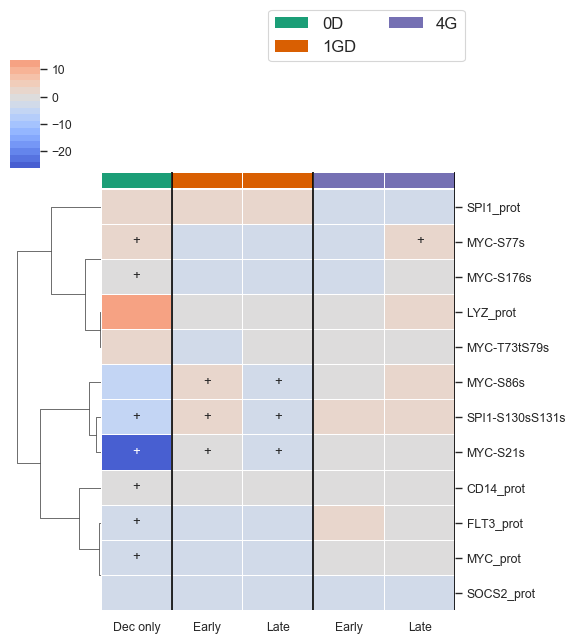

In [10]:
gns = [
     'CD134', 'CD14', 
    # 'RUNX2','GATA2', 'GATA1',
    # 'MYB', 'CEBPA', # non-significant
    'MYC',
    'LYZ',
    #  'DNTT', 'CD79B', 'MS4A1', 'CD27', 'TNFRSF17', # from the paper
    # 'HBA1', # from the paper
    'FLT3', #'ABL1', 'SRC', 
    # 'STAT5A',  'STAT5B',
    'SOCS2',  'SPI1',
    # 'BBC3', 'BCL2L1',
    # 'PTPN11',
    # 'CDKN1B', 
    
]
exp.subset(gns, index='identifier',).require_n_sig(n_sig=0, index='label').heatmap(
    convert_to_log=False,
    subset_index='identifier',
#     min_sig=1,
    index='label',
    columns=['drug', 'stage', ],
    figsize=(6, 6), cluster_col=False,
    cluster_row=True,
    linewidths=0.01,
    y_tick_labels=True
);

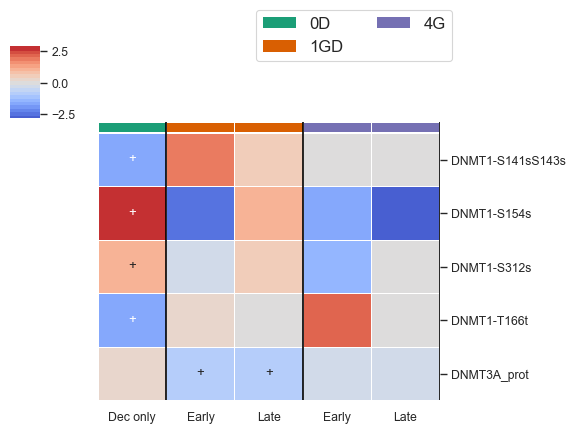

In [13]:
gns = [
      
    'DNMT3A', 'DNMT3B', 'DNMT1',
    
    # 'FLT3',  
    
]
exp.subset(gns, index='identifier',).require_n_sig(n_sig=1, index='label').heatmap(
    convert_to_log=True,
    subset_index='identifier',
#     min_sig=1,
    index='label',
    columns=['drug', 'stage', ],
    figsize=(6, 4), cluster_col=False,
    cluster_row=False,
    sort_row='index',
    linewidths=0.01,
    y_tick_labels=True
);
plt.savefig('dnmt_heatmap.png', dpi=300, bbox_inches='tight')
plt.savefig('dnmt_heatmap.pdf', dpi=300, bbox_inches='tight')

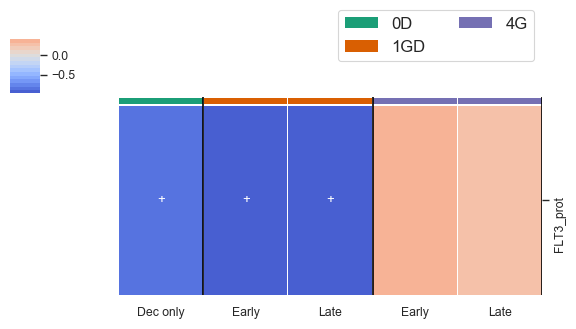

In [14]:
gns = [
      
    # 'DNMT3A', 'DNMT3B', 'DNMT1',
    
    'FLT3',  
    
]
exp.subset(gns, index='identifier',).require_n_sig(n_sig=1, index='label').heatmap(
    convert_to_log=True,
    subset_index='identifier',
#     min_sig=1,
    index='label',
    columns=['drug', 'stage', ],
    figsize=(6, 3), cluster_col=False,
    cluster_row=False,
    sort_row='index',
    linewidths=0.01,
    y_tick_labels=True
);
plt.savefig('flt3_heatmap.png', dpi=300, bbox_inches='tight')
plt.savefig('flt3_heatmap.pdf', dpi=300, bbox_inches='tight')

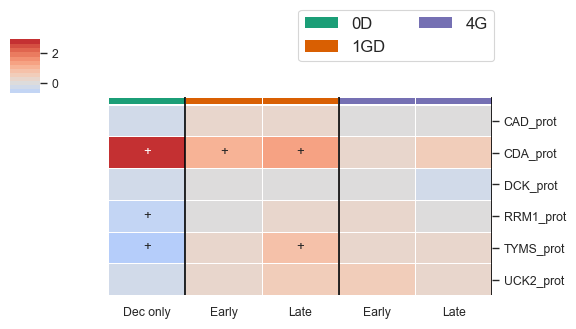

In [15]:

gns = [
      'TYMS', 'RRM1',
    'DCK', 'UCK2',
    'CDA', 'CAD',
    # 'DNMT3A', 'DNMT3B', 'DNMT1',
    
    # 'FLT3',  
    
]
protein.subset(gns, index='identifier',).require_n_sig(n_sig=0, index='label').heatmap(
    convert_to_log=True,
    subset_index='identifier',
#     min_sig=1,
    index='label',
    columns=['drug', 'stage', ],
    figsize=(6, 3), cluster_col=False,
    cluster_row=False,
    sort_row='index',
    linewidths=0.01,
    y_tick_labels=True
);